# 교통량의 영향요인 확인

In [1]:
# 필요 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
# 폰트 설정
plt.rc('font', family='NanumGothic')

In [3]:
# 2022_도로_교량_및_터널현황조서 파일 불러오기
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플/2022_도로_교량_및_터널현황조서.xls'
df1 = pd.read_excel(excelFile, sheet_name = 1)
df1.head()

,도로종류,노선명,시설명,시도,시군구,읍면동,리,총길이,총폭,유효폭,...,경간수,최대경간장,상부구조,하부구조,설계하중,교통량,기관구분1,기관구분2,기관구분3,준공년도
0,고속국도,고속국도12호선,88낙동강교(광주),대구광역시,달성군,논공읍,위천리,812.0,15.7,14.7,...,22.0,60.0,PSCI거더교,NaN,DB-24,17850.0,전문관리기관,한국도로공사,고령지사,1984
1,고속국도,고속국도12호선,88낙동강교(대구),대구광역시,달성군,논공읍,위천리,806.0,15.8,14.9,...,14.0,61.2,강박스거더교,NaN,DB-24,17850.0,전문관리기관,한국도로공사,고령지사,2006
2,고속국도,고속국도25호선,RAMP-A교,전라남도,장성군,남면,삼태리,90.0,13.9,13.0,...,2.0,45.0,PSCI거더교,역 T형식교대,DB-24,20998.0,자치단체,광주,시청,2015
3,고속국도,고속국도25호선,RAMP-H교,전라남도,장성군,남면,삼태리,55.0,7.9,7.0,...,1.0,55.0,강박스거더교,역 T형식교대,DB-24,20998.0,자치단체,광주,종합건설본부,2016
4,고속국도,고속국도25호선,RAMP-I교,전라남도,장성군,남면,삼태리,55.0,7.9,7.0,...,1.0,55.0,강박스거더교,역 T형식교대,DB-24,20998.0,자치단체,광주,종합건설본부,2016


In [4]:
df1.columns

Index(['도로종류', '노선명', '시설명', '시도', '시군구', '읍면동', '리', '총길이', '총폭', '유효폭', '높이',
       '경간수', '최대경간장', '상부구조', '하부구조', '설계하중', '교통량', '기관구분1', '기관구분2',
       '기관구분3', '준공년도'],
      dtype='object')

In [5]:
# df1의 불필요한 컬럼 제거
df1.drop(['노선명', '읍면동', '리', '총길이', '총폭', '유효폭', '높이',
       '경간수', '최대경간장', '하부구조',  '기관구분1', '기관구분2',
       '기관구분3'], axis = 1, inplace = True)

In [6]:
df1.head()

,도로종류,시설명,시도,시군구,상부구조,설계하중,교통량,준공년도
0,고속국도,88낙동강교(광주),대구광역시,달성군,PSCI거더교,DB-24,17850.0,1984
1,고속국도,88낙동강교(대구),대구광역시,달성군,강박스거더교,DB-24,17850.0,2006
2,고속국도,RAMP-A교,전라남도,장성군,PSCI거더교,DB-24,20998.0,2015
3,고속국도,RAMP-H교,전라남도,장성군,강박스거더교,DB-24,20998.0,2016
4,고속국도,RAMP-I교,전라남도,장성군,강박스거더교,DB-24,20998.0,2016


In [7]:
# 국토교통부_교량_20220627 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/국토교통부_교량_20220627.csv'
df2 = pd.read_csv(csvFile, encoding = 'euc-kr')
df2.head()

,교량명,시설물종별등급구분,도로종류,도로노선명,도로노선번호,도로노선방향,시도명,시군구명,시군구코드,소재지도로명주소,...,내진설계적용여부,내진성능확보여부,교량보수보강내역,교량보수보강비용,설계활하중,허용통행하중,하부통과제한높이,관리기관명,관리기관전화번호,데이터기준일자
0,진위교,2,일반국도,일반국도1호선,1.0,3,경기도,평택시,41220,NaN,...,미적용,N,NaN,NaN,DB-24,43.2,NaN,서울청 수원사무소,031-218-1777,2022-06-27
1,풍계교,3,일반국도,일반국도3호선,3.0,3,경기도,이천시,41500,NaN,...,미적용,N,NaN,NaN,DB-24,43.2,4.5,서울청 수원사무소,031-218-1777,2022-06-27
2,태평교,3,일반국도,일반국도3호선,3.0,3,경기도,여주시,41670,NaN,...,미적용,N,NaN,NaN,DB-24,43.2,3.0,서울청 수원사무소,031-218-1777,2022-06-27
3,장평교,2,일반국도,일반국도3호선,3.0,3,경기도,이천시,41500,NaN,...,미적용,N,NaN,NaN,DB-24,43.2,NaN,서울청 수원사무소,031-218-1777,2022-06-27
4,풍계교,3,일반국도,일반국도37호선,37.0,3,경기도,이천시,41500,NaN,...,미적용,N,NaN,NaN,DB-18(성능개선),32.4,7.0,서울청 수원사무소,031-218-1777,2022-06-27


In [8]:
df2.columns = ['시설명', '시설물종별등급구분', '도로종류', '도로노선명', '도로노선번호', '도로노선방향', '시도명', '시군구명',
       '시군구코드', '소재지도로명주소', '소재지지번주소', '교량시작점위도', '교량시작점경도', '교량종료점위도',
       '교량종료점경도', '교량연장', '교량폭', '교량보도폭', '교량높이', '차로수', '상하행선분리여부', '상부구조형식',
       '교량준공연도', '최종안전점검일자', '최종안전점검결과', '최종안전점검유형', '내진설계적용여부', '내진성능확보여부',
       '교량보수보강내역', '교량보수보강비용', '설계활하중', '허용통행하중', '하부통과제한높이', '관리기관명',
       '관리기관전화번호', '데이터기준일자']

In [9]:
# df2의 불필요한 컬럼 제거
df2.drop(['도로종류', '도로노선명', '도로노선번호', '도로노선방향', '시도명', '시군구명',
       '시군구코드', '소재지도로명주소', '소재지지번주소', '교량시작점위도', '교량시작점경도', '교량종료점위도',
       '교량종료점경도', '교량폭', '교량보도폭', '교량높이', '차로수', '상하행선분리여부', '상부구조형식',
       '교량준공연도', '내진설계적용여부', '내진성능확보여부', '설계활하중', '허용통행하중', '하부통과제한높이', '관리기관명',
       '관리기관전화번호', '데이터기준일자'], axis = 1, inplace = True)

In [10]:
df2.head()

,시설명,시설물종별등급구분,교량연장,최종안전점검일자,최종안전점검결과,최종안전점검유형,교량보수보강내역,교량보수보강비용
0,진위교,2,125.0,2021-12-23,B,정기점검,NaN,NaN
1,풍계교,3,55.0,2021-12-02,B,정기점검,NaN,NaN
2,태평교,3,43.8,2021-12-02,B,정기점검,NaN,NaN
3,장평교,2,105.0,2021-12-31,B,정기점검,NaN,NaN
4,풍계교,3,44.0,2021-12-02,B,정기점검,NaN,NaN


In [11]:
# 시설명 기준으로 inner join
merge_df = pd.merge(df1, df2, on = '시설명', how = 'inner')
merge_df.head()

,도로종류,시설명,시도,시군구,상부구조,설계하중,교통량,준공년도,시설물종별등급구분,교량연장,최종안전점검일자,최종안전점검결과,최종안전점검유형,교량보수보강내역,교량보수보강비용
0,고속국도,88낙동강교(광주),대구광역시,달성군,PSCI거더교,DB-24,17850.0,1984,1,812.0,2021-10-15,B,정기점검,NaN,NaN
1,고속국도,88낙동강교(대구),대구광역시,달성군,강박스거더교,DB-24,17850.0,2006,1,806.0,2021-10-15,B,정기점검,NaN,NaN
2,고속국도,RAMP-A교,전라남도,장성군,PSCI거더교,DB-24,20998.0,2015,2,180.0,2021-12-31,B,정기점검,NaN,NaN
3,고속국도,RAMP-A교,전라남도,장성군,PSCI거더교,DB-24,20998.0,2015,99,110.0,2021-12-31,B,정기점검,NaN,NaN
4,고속국도,RAMP-A교,전라남도,장성군,PSCI거더교,DB-24,20998.0,2015,2,120.0,2021-10-29,B,정기점검,NaN,NaN


In [12]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70879 entries, 0 to 70878
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   도로종류       70879 non-null  object 
 1   시설명        70879 non-null  object 
 2   시도         70879 non-null  object 
 3   시군구        70879 non-null  object 
 4   상부구조       70879 non-null  object 
 5   설계하중       70879 non-null  object 
 6   교통량        52205 non-null  float64
 7   준공년도       70879 non-null  int64  
 8   시설물종별등급구분  70879 non-null  int64  
 9   교량연장       70879 non-null  float64
 10  최종안전점검일자   70879 non-null  object 
 11  최종안전점검결과   70879 non-null  object 
 12  최종안전점검유형   70879 non-null  object 
 13  교량보수보강내역   500 non-null    object 
 14  교량보수보강비용   492 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 8.1+ MB


In [13]:
# 시설명 기준으로 중복 행 제거
merge_df = merge_df.drop_duplicates(['시설명'], keep = 'first')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25011 entries, 0 to 70878
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   도로종류       25011 non-null  object 
 1   시설명        25011 non-null  object 
 2   시도         25011 non-null  object 
 3   시군구        25011 non-null  object 
 4   상부구조       25011 non-null  object 
 5   설계하중       25011 non-null  object 
 6   교통량        21399 non-null  float64
 7   준공년도       25011 non-null  int64  
 8   시설물종별등급구분  25011 non-null  int64  
 9   교량연장       25011 non-null  float64
 10  최종안전점검일자   25011 non-null  object 
 11  최종안전점검결과   25011 non-null  object 
 12  최종안전점검유형   25011 non-null  object 
 13  교량보수보강내역   132 non-null    object 
 14  교량보수보강비용   131 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 3.1+ MB


In [14]:
# 서울과 경기도의 데이터만 별도로 new_df에 저장
new_df = merge_df[(merge_df['시도'] == '서울특별시') | (merge_df['시도'] == '경기도')]
new_df.reset_index(drop = True, inplace = True)
new_df.head()

,도로종류,시설명,시도,시군구,상부구조,설계하중,교통량,준공년도,시설물종별등급구분,교량연장,최종안전점검일자,최종안전점검결과,최종안전점검유형,교량보수보강내역,교량보수보강비용
0,고속국도,가남JCT육교(강릉),경기도,여주군,강박스거더교,DB-24,24562.0,1994,2,225.0,2021-12-22,B,정기점검,NaN,NaN
1,고속국도,가남JCT육교(인천),경기도,여주군,강박스거더교,DB-24,24562.0,1994,2,225.0,2021-12-22,B,정기점검,NaN,NaN
2,고속국도,가남교(강릉0),경기도,여주군,프리플렉스거더교,DB-24,61826.0,2003,3,25.0,2021-10-29,B,정기점검,NaN,NaN
3,고속국도,가남교(강릉1),경기도,여주군,PSCI거더교,DB-24,61826.0,2010,3,25.0,2021-10-29,B,정기점검,NaN,NaN
4,고속국도,가남교(인천),경기도,여주군,프리플렉스거더교,DB-24,61826.0,2003,3,25.0,2021-10-29,B,정기점검,NaN,NaN


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093 entries, 0 to 5092
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   도로종류       5093 non-null   object 
 1   시설명        5093 non-null   object 
 2   시도         5093 non-null   object 
 3   시군구        5093 non-null   object 
 4   상부구조       5093 non-null   object 
 5   설계하중       5093 non-null   object 
 6   교통량        4110 non-null   float64
 7   준공년도       5093 non-null   int64  
 8   시설물종별등급구분  5093 non-null   int64  
 9   교량연장       5093 non-null   float64
 10  최종안전점검일자   5093 non-null   object 
 11  최종안전점검결과   5093 non-null   object 
 12  최종안전점검유형   5093 non-null   object 
 13  교량보수보강내역   41 non-null     object 
 14  교량보수보강비용   45 non-null     float64
dtypes: float64(3), int64(2), object(10)
memory usage: 597.0+ KB


In [16]:
# 결측값 대체
new_df['교통량'].fillna(new_df['교통량'].mean(), inplace = True)
new_df['교량보수보강내역'].fillna('N', inplace = True)
new_df['교량보수보강비용'].fillna(0, inplace = True)

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\3155620190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['교통량'].fillna(new_df['교통량'].mean(), inplace = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\3155620190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['교량보수보강내역'].fillna('N', inplace = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\3155620190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093 entries, 0 to 5092
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   도로종류       5093 non-null   object 
 1   시설명        5093 non-null   object 
 2   시도         5093 non-null   object 
 3   시군구        5093 non-null   object 
 4   상부구조       5093 non-null   object 
 5   설계하중       5093 non-null   object 
 6   교통량        5093 non-null   float64
 7   준공년도       5093 non-null   int64  
 8   시설물종별등급구분  5093 non-null   int64  
 9   교량연장       5093 non-null   float64
 10  최종안전점검일자   5093 non-null   object 
 11  최종안전점검결과   5093 non-null   object 
 12  최종안전점검유형   5093 non-null   object 
 13  교량보수보강내역   5093 non-null   object 
 14  교량보수보강비용   5093 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 597.0+ KB


In [18]:
# 교통량 데이터타입 변경
new_df['교통량'] = new_df['교통량'].astype(int)

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2821197051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['교통량'] = new_df['교통량'].astype(int)


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093 entries, 0 to 5092
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   도로종류       5093 non-null   object 
 1   시설명        5093 non-null   object 
 2   시도         5093 non-null   object 
 3   시군구        5093 non-null   object 
 4   상부구조       5093 non-null   object 
 5   설계하중       5093 non-null   object 
 6   교통량        5093 non-null   int32  
 7   준공년도       5093 non-null   int64  
 8   시설물종별등급구분  5093 non-null   int64  
 9   교량연장       5093 non-null   float64
 10  최종안전점검일자   5093 non-null   object 
 11  최종안전점검결과   5093 non-null   object 
 12  최종안전점검유형   5093 non-null   object 
 13  교량보수보강내역   5093 non-null   object 
 14  교량보수보강비용   5093 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(10)
memory usage: 577.1+ KB


In [20]:
# 준공년도에 따른 교통량 합계
def get_category(year):
    if year > 2009:
        return '2010년 이후'
    elif year > 1999:
        return '2000년 이후'
    elif year > 1989:
        return '1990년 이후'
    else:
        return '1990년 이전'

In [21]:
new_df['New_year'] = new_df['준공년도'].apply(lambda x: get_category(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2773997388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['New_year'] = new_df['준공년도'].apply(lambda x: get_category(x))


In [22]:
new_df.head()

,도로종류,시설명,시도,시군구,상부구조,설계하중,교통량,준공년도,시설물종별등급구분,교량연장,최종안전점검일자,최종안전점검결과,최종안전점검유형,교량보수보강내역,교량보수보강비용,New_year
0,고속국도,가남JCT육교(강릉),경기도,여주군,강박스거더교,DB-24,24562,1994,2,225.0,2021-12-22,B,정기점검,N,0.0,1990년 이후
1,고속국도,가남JCT육교(인천),경기도,여주군,강박스거더교,DB-24,24562,1994,2,225.0,2021-12-22,B,정기점검,N,0.0,1990년 이후
2,고속국도,가남교(강릉0),경기도,여주군,프리플렉스거더교,DB-24,61826,2003,3,25.0,2021-10-29,B,정기점검,N,0.0,2000년 이후
3,고속국도,가남교(강릉1),경기도,여주군,PSCI거더교,DB-24,61826,2010,3,25.0,2021-10-29,B,정기점검,N,0.0,2010년 이후
4,고속국도,가남교(인천),경기도,여주군,프리플렉스거더교,DB-24,61826,2003,3,25.0,2021-10-29,B,정기점검,N,0.0,2000년 이후


In [23]:
# 연도범주별 교통량합계 확인
sum_Newyear = new_df[['New_year', '교통량']].groupby(['New_year'], as_index = False).sum()
sum_Newyear

,New_year,교통량
0,1990년 이전,15708383
1,1990년 이후,68410842
2,2000년 이후,65357676
3,2010년 이후,49588282


In [24]:
# 연도범주별 교통량평균 확인
mean_Newyear = new_df[['New_year', '교통량']].groupby(['New_year'], as_index = False).mean()
mean_Newyear

,New_year,교통량
0,1990년 이전,36361.997685
1,1990년 이후,47375.929363
2,2000년 이후,40645.320896
3,2010년 이후,30819.317589


C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2501914849.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


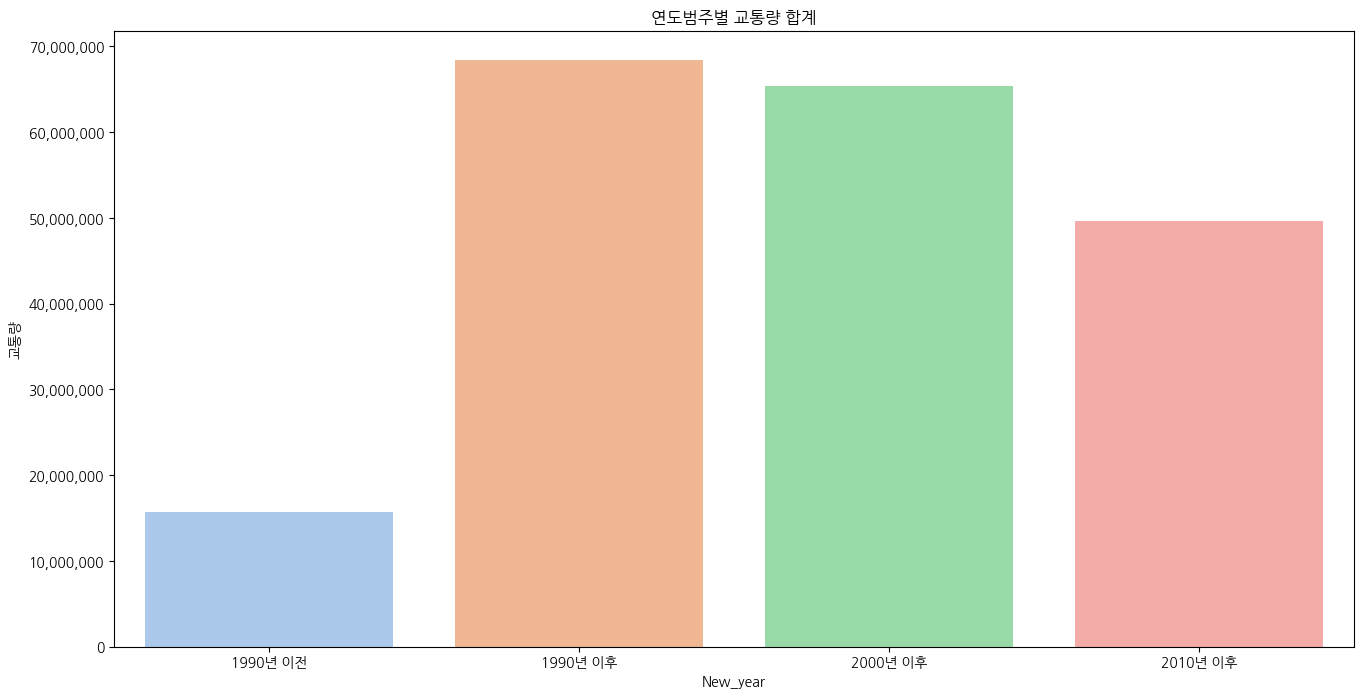

In [25]:
# 준공년도를 새로 범주화 하여 연도범주별 교통량합계 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_year', y = '교통량', palette = 'pastel', data = sum_Newyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('연도범주별 교통량 합계')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\3805288638.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


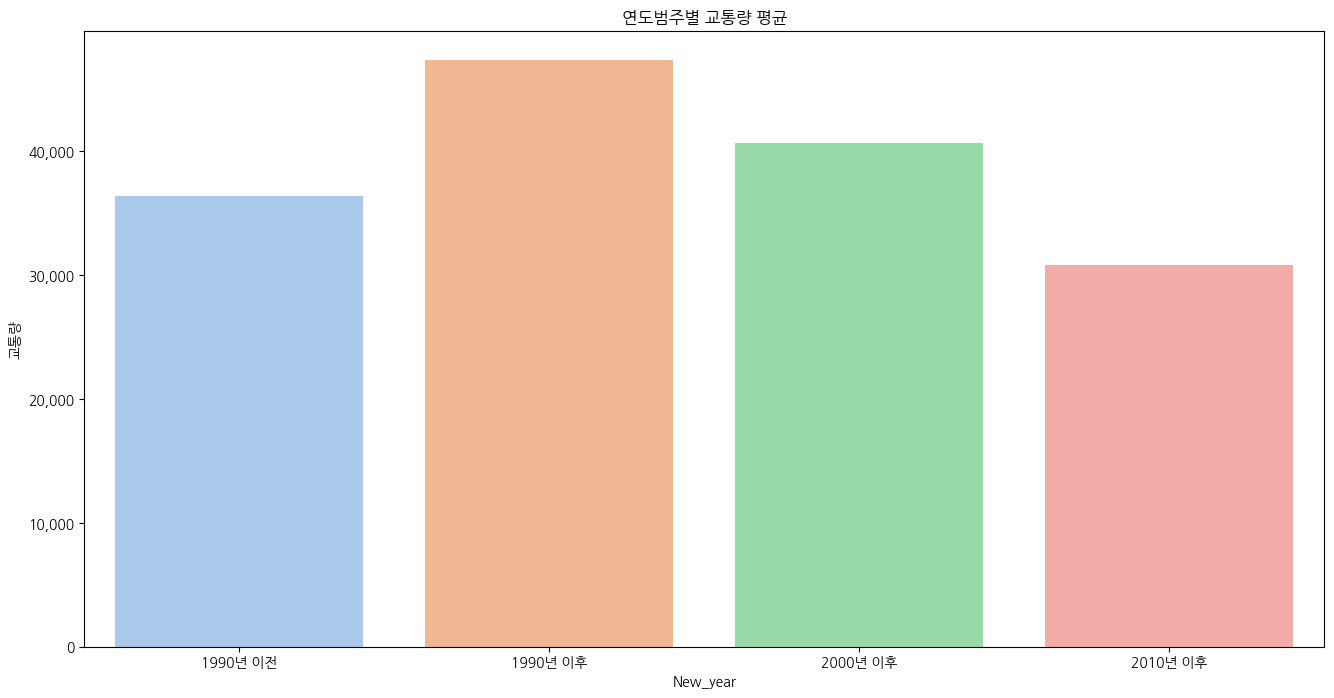

In [26]:
# 준공년도를 새로 범주화 하여 연도범주별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_year', y = '교통량', palette = 'pastel', data = mean_Newyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('연도범주별 교통량 평균')
plt.show()

In [27]:
# 준공 후 경과년수에 따른 교통량 합계
def category_year(myYear):
    if datetime.today().year - myYear < 5:
        return '5년 미만'
    elif datetime.today().year - myYear < 10:
        return '5년 이상 10년 미만'
    elif datetime.today().year - myYear < 15:
        return '10년 이상 15년 미만'
    elif datetime.today().year - myYear < 20:
        return '15년 이상 20년 미만'
    elif datetime.today().year - myYear < 25:
        return '20년 이상 25년 미만'
    else:
        return '25년 이상'

In [28]:
new_df['Cum_year'] = new_df['준공년도'].apply(lambda x: category_year(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2034490400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cum_year'] = new_df['준공년도'].apply(lambda x: category_year(x))


In [29]:
# 준공 후 경과년수별 교통량합계 확인
sum_Cumyear = new_df[['Cum_year', '교통량']].groupby(['Cum_year'], as_index = False).sum().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
sum_Cumyear

,Cum_year,교통량
0,25년 이상,78590843
1,20년 이상 25년 미만,41360551
2,10년 이상 15년 미만,28538689
3,5년 이상 10년 미만,24901610
4,15년 이상 20년 미만,22363858
5,5년 미만,3309632


In [30]:
# 준공 후 경과년수별 교통량평균 확인
mean_Cumyear = new_df[['Cum_year', '교통량']].groupby(['Cum_year'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_Cumyear

,Cum_year,교통량
0,20년 이상 25년 미만,45202.787978
1,25년 이상,45141.207926
2,10년 이상 15년 미만,37305.475817
3,15년 이상 20년 미만,34300.395706
4,5년 미만,29816.504505
5,5년 이상 10년 미만,27394.510451


C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\1168911519.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


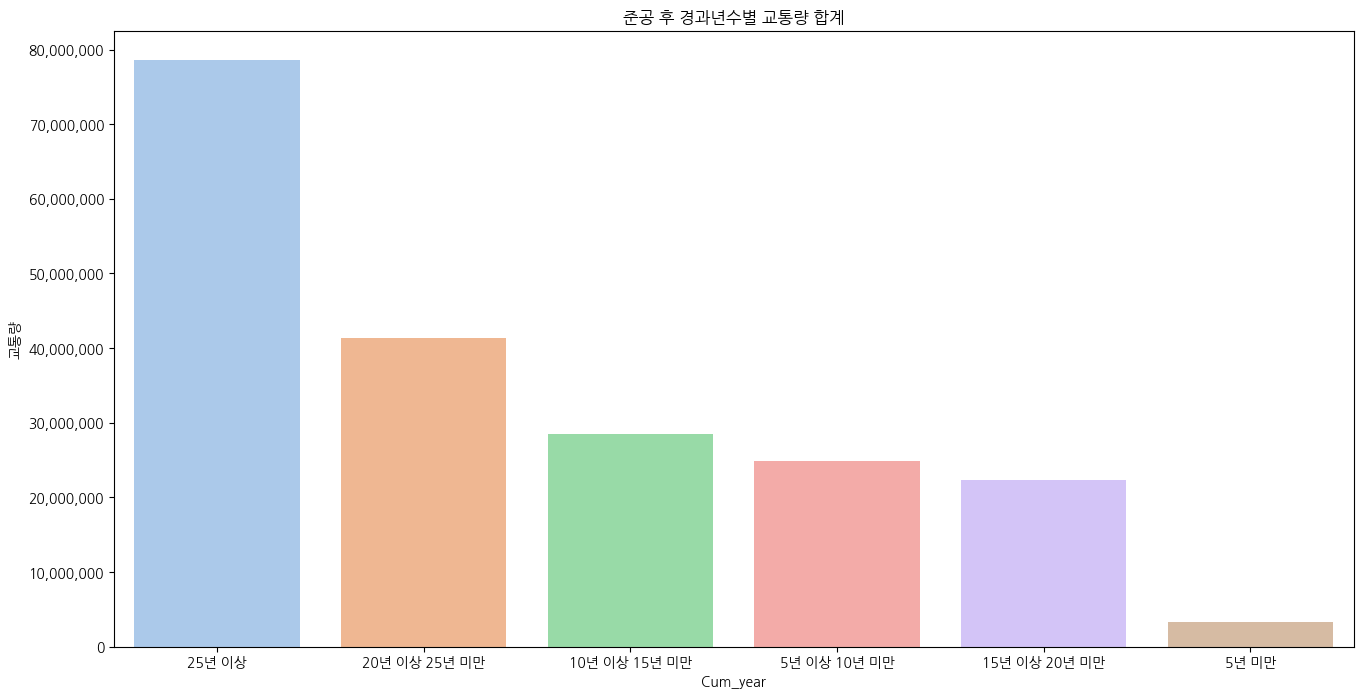

In [31]:
# 준공 후 경과년수별 교통량합계 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'Cum_year', y = '교통량', palette = 'pastel', data = sum_Cumyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('준공 후 경과년수별 교통량 합계')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\677480552.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


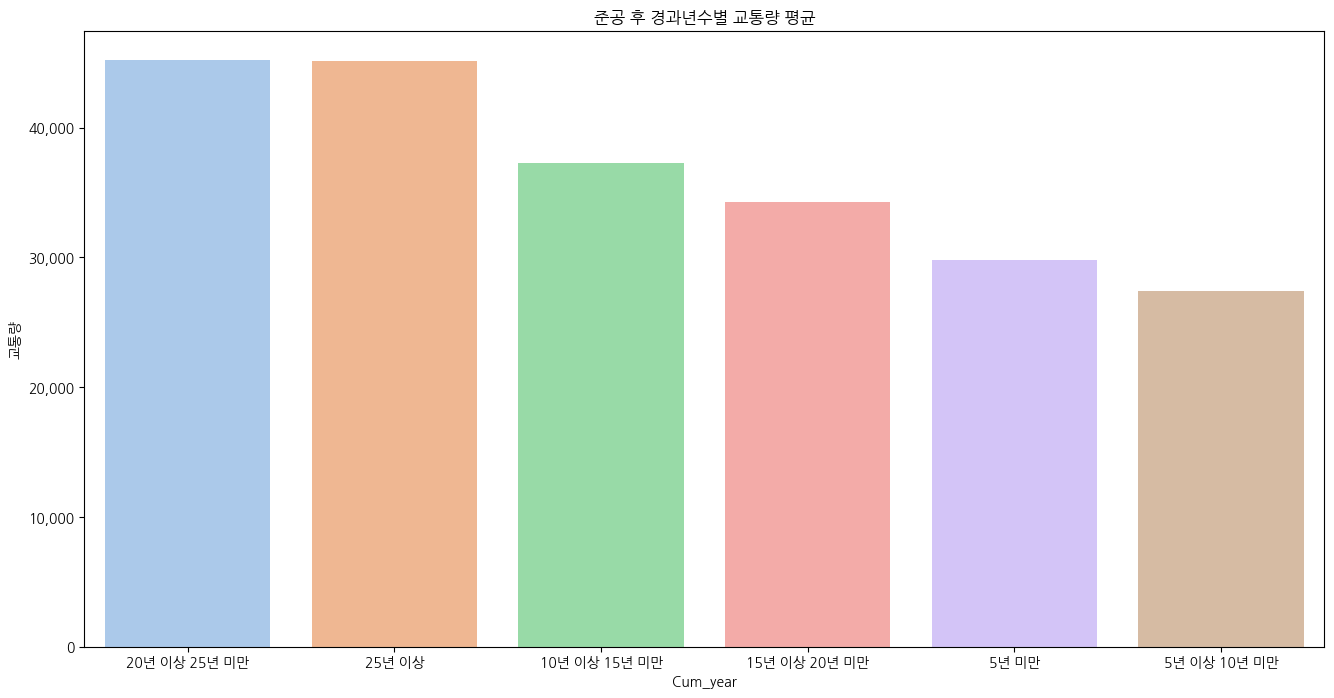

In [32]:
# 준공 후 경과년수별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'Cum_year', y = '교통량', palette = 'pastel', data = mean_Cumyear)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('준공 후 경과년수별 교통량 평균')
plt.show()

In [33]:
# 상부구조에 따른 교통량
def category_struc(struc):
    if struc.endswith('거더교'):
        return '거더교'
    elif struc.endswith('슬래브교'):
        return '슬래브교'
    elif struc.endswith('라멘교'):
        return '라멘교'
    elif struc.endswith('사장교'):
        return '사장교'
    elif struc.endswith('아치교'):
        return '아치교'
    elif struc.endswith('트러스트교'):
        return '트러스트교'
    else:
        return '기타'

In [34]:
new_df['New_Struc'] = new_df['상부구조'].apply(lambda x: category_struc(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2149885707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['New_Struc'] = new_df['상부구조'].apply(lambda x: category_struc(x))


In [35]:
new_df.head()

,도로종류,시설명,시도,시군구,상부구조,설계하중,교통량,준공년도,시설물종별등급구분,교량연장,최종안전점검일자,최종안전점검결과,최종안전점검유형,교량보수보강내역,교량보수보강비용,New_year,Cum_year,New_Struc
0,고속국도,가남JCT육교(강릉),경기도,여주군,강박스거더교,DB-24,24562,1994,2,225.0,2021-12-22,B,정기점검,N,0.0,1990년 이후,25년 이상,거더교
1,고속국도,가남JCT육교(인천),경기도,여주군,강박스거더교,DB-24,24562,1994,2,225.0,2021-12-22,B,정기점검,N,0.0,1990년 이후,25년 이상,거더교
2,고속국도,가남교(강릉0),경기도,여주군,프리플렉스거더교,DB-24,61826,2003,3,25.0,2021-10-29,B,정기점검,N,0.0,2000년 이후,20년 이상 25년 미만,거더교
3,고속국도,가남교(강릉1),경기도,여주군,PSCI거더교,DB-24,61826,2010,3,25.0,2021-10-29,B,정기점검,N,0.0,2010년 이후,10년 이상 15년 미만,거더교
4,고속국도,가남교(인천),경기도,여주군,프리플렉스거더교,DB-24,61826,2003,3,25.0,2021-10-29,B,정기점검,N,0.0,2000년 이후,20년 이상 25년 미만,거더교


In [36]:
# 상부구조별 교통량합계 확인
sum_structure = new_df[['New_Struc', '교통량']].groupby(['New_Struc'], as_index = False).sum().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
sum_structure

,New_Struc,교통량
0,거더교,115004359
1,라멘교,48889073
2,슬래브교,28833451
3,기타,4775637
4,아치교,1342999
5,사장교,219664


In [37]:
# 상부구조별 교통량평균 확인
mean_structure = new_df[['New_Struc', '교통량']].groupby(['New_Struc'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_structure

,New_Struc,교통량
0,거더교,40380.744031
1,라멘교,40138.811987
2,아치교,37305.527778
3,슬래브교,34823.008454
4,기타,30810.561290
5,사장교,27458.000000


C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2627225927.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


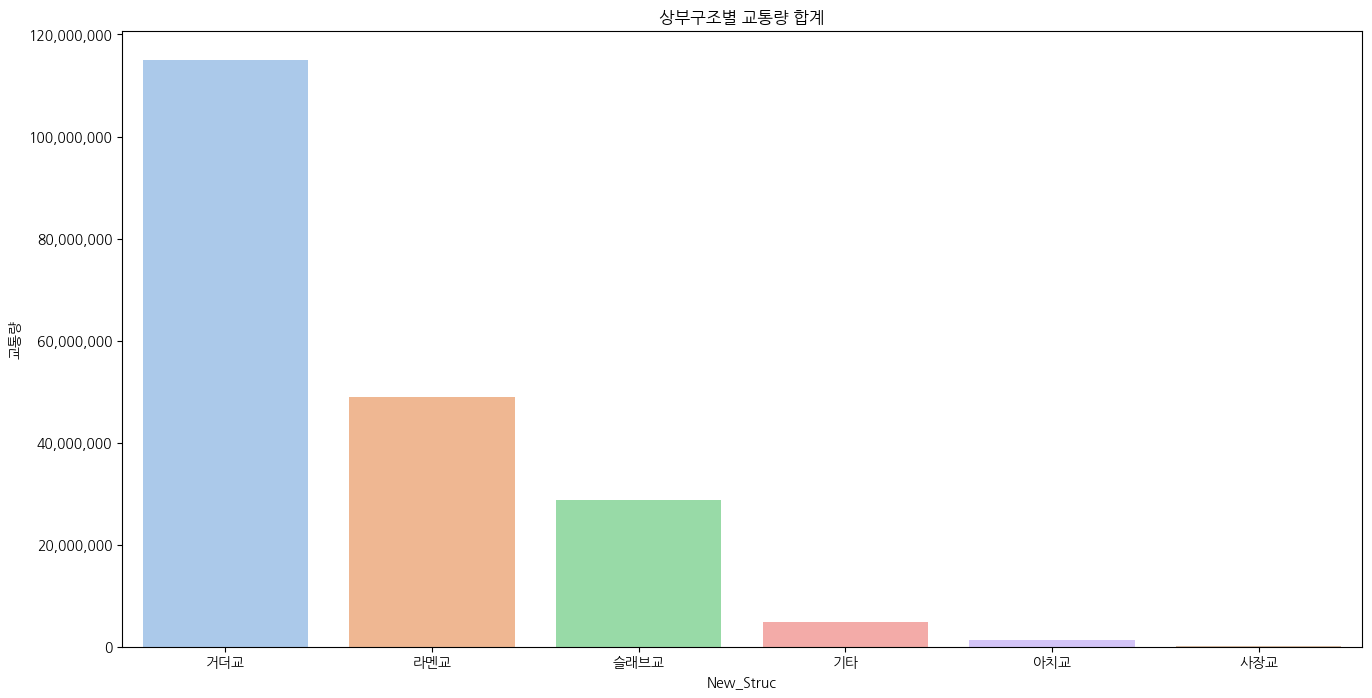

In [38]:
# 상부구조별 교통량합계 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', palette = 'pastel', data = sum_structure)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 교통량 합계')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\3708323869.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


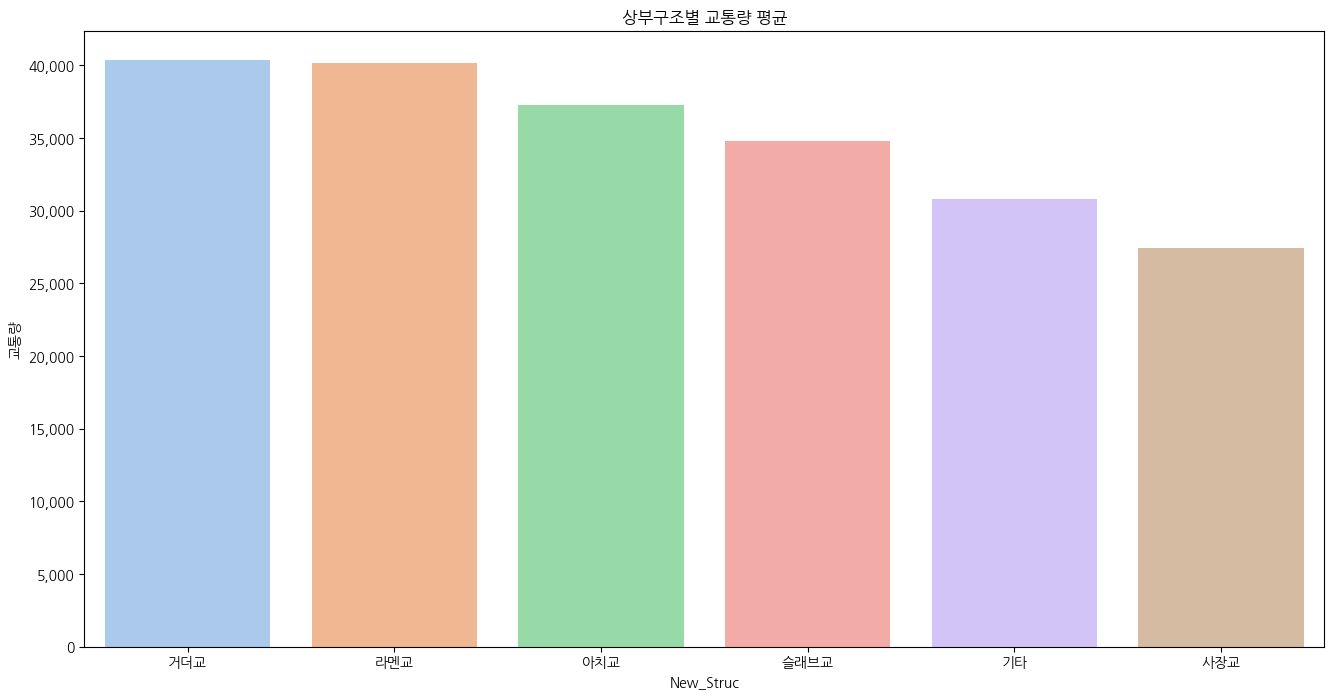

In [39]:
# 상부구조별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_Struc', y = '교통량', palette = 'pastel', data = mean_structure)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('상부구조별 교통량 평균')
plt.show()

In [40]:
# 도로종류에 따른 교통량합계
sum_load = new_df[['도로종류', '교통량']].groupby(['도로종류'], as_index = False).sum().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
sum_load

,도로종류,교통량
0,고속국도,129717248
1,시도,23182912
2,일반국도,21191358
3,"특별,광역시도",10195528
4,지방도,7329728
5,국가지원지방도,3649352
6,구도,2111086
7,군도,1687971


In [41]:
# 도로종류에 따른 교통량평균
mean_load = new_df[['도로종류', '교통량']].groupby(['도로종류'], as_index = False).mean().sort_values(by = '교통량', ascending = False).reset_index(drop = True)
mean_load

,도로종류,교통량
0,고속국도,55936.717551
1,"특별,광역시도",38914.229008
2,구도,37036.596491
3,시도,34756.989505
4,군도,33097.470588
5,일반국도,21149.059880
6,지방도,16073.964912
7,국가지원지방도,13080.114695


C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2122724850.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


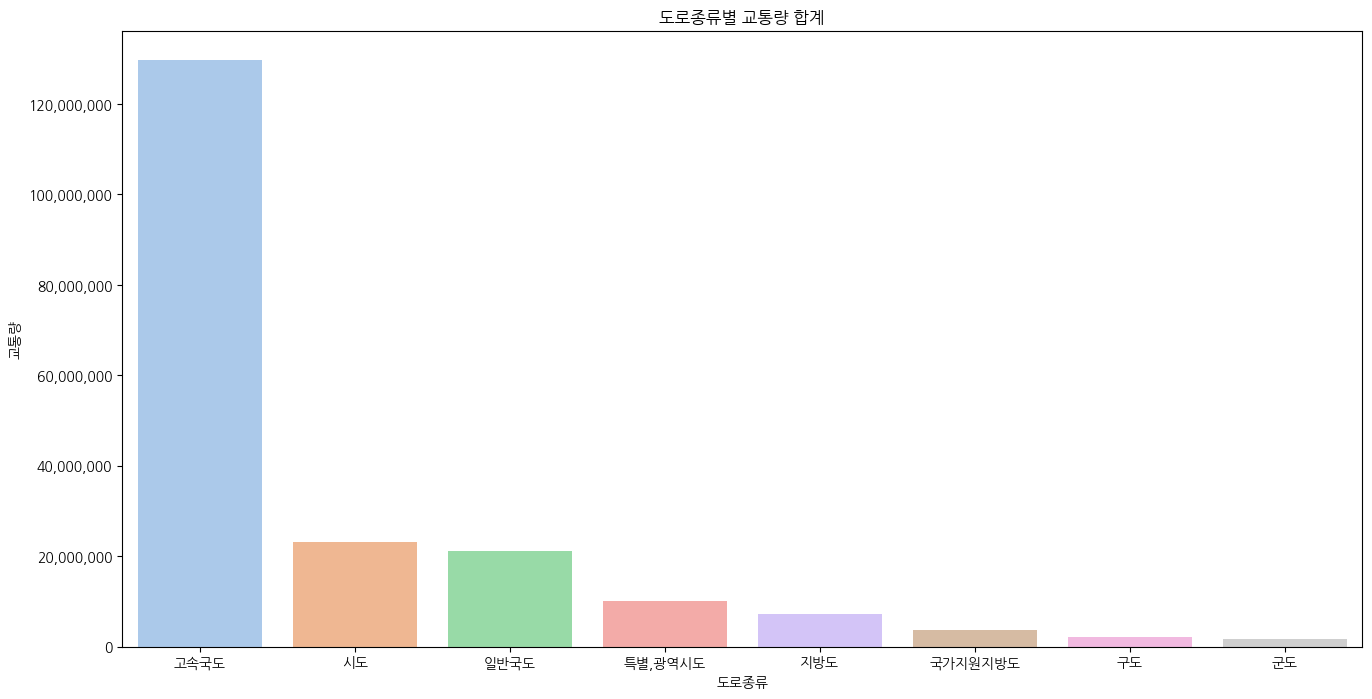

In [42]:
# 도로종류별 교통량합계 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '도로종류', y = '교통량', palette = 'pastel', data = sum_load)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('도로종류별 교통량 합계')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\1277198357.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


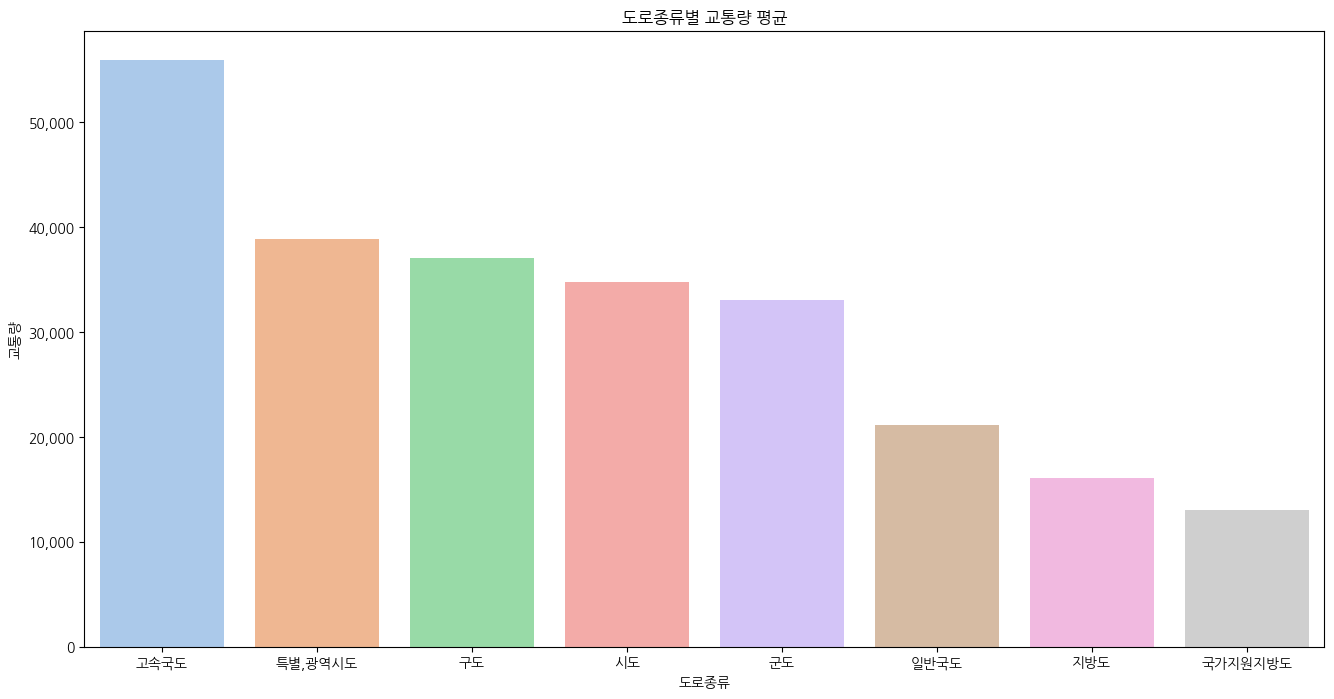

In [43]:
# 도로종류별 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '도로종류', y = '교통량', palette = 'pastel', data = mean_load)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('도로종류별 교통량 평균')
plt.show()

In [44]:
# 새로운 시설물 등급컬럼 생성
# 1, 2, 3종 이외에 99라 적힌 부분을 기타로 통합
def new_facility(facility):
    if facility == 1:
        return '1종 시설물'
    elif facility == 2:
        return '2종 시설물'
    elif facility == 3:
        return '3종 시설물'
    else:
        return '기타'

In [45]:
new_df['New_facility'] = new_df['시설물종별등급구분'].apply(lambda x: new_facility(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2035961984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['New_facility'] = new_df['시설물종별등급구분'].apply(lambda x: new_facility(x))


In [46]:
# 시설물등급에 따른 교통량합계
sum_facility = new_df[['New_facility', '교통량']].groupby(['New_facility'], as_index = False).sum()
sum_facility

,New_facility,교통량
0,1종 시설물,35326586
1,2종 시설물,36226121
2,3종 시설물,66045316
3,기타,61467160


In [47]:
# 시설물등급에 따른 교통량평균
mean_facility = new_df[['New_facility', '교통량']].groupby(['New_facility'], as_index = False).mean()
mean_facility

,New_facility,교통량
0,1종 시설물,43081.202439
1,2종 시설물,35481.019589
2,3종 시설물,41986.850604
3,기타,36609.386540


C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2679594552.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


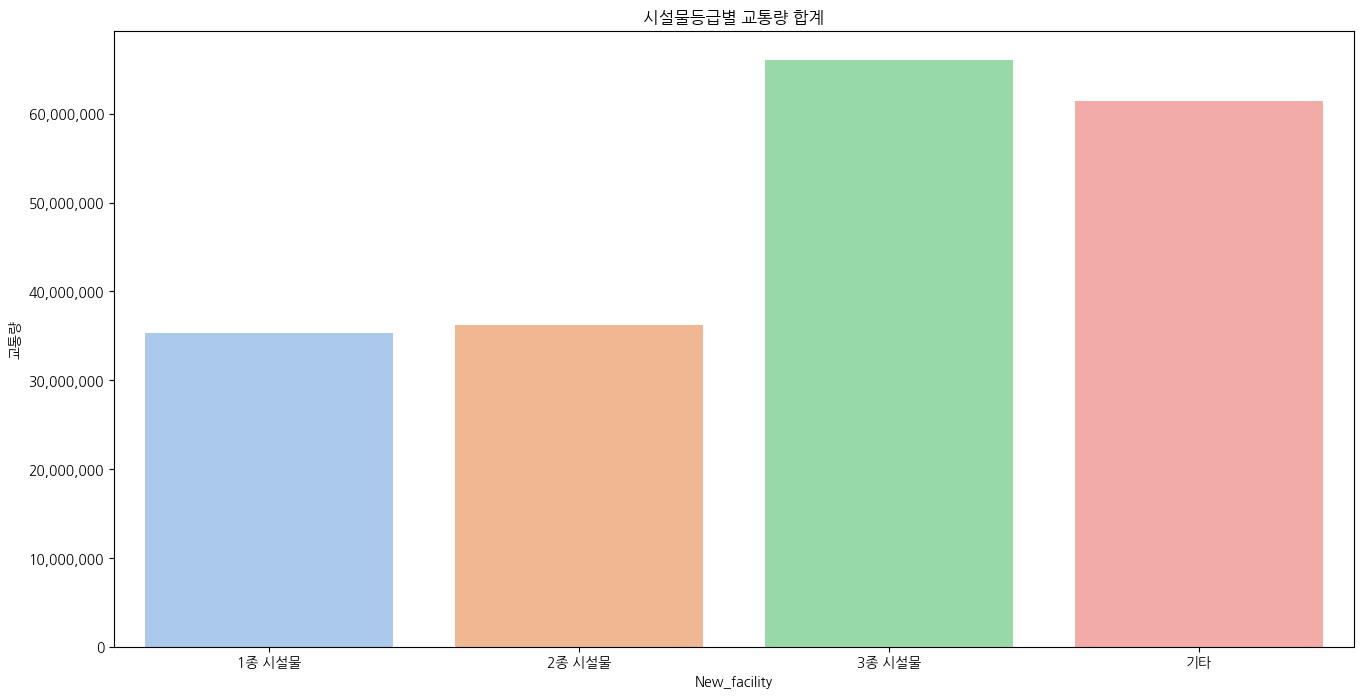

In [48]:
# 시설물등급에 따른 교통량합계 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_facility', y = '교통량', palette = 'pastel', data = sum_facility)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별 교통량 합계')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\326198430.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


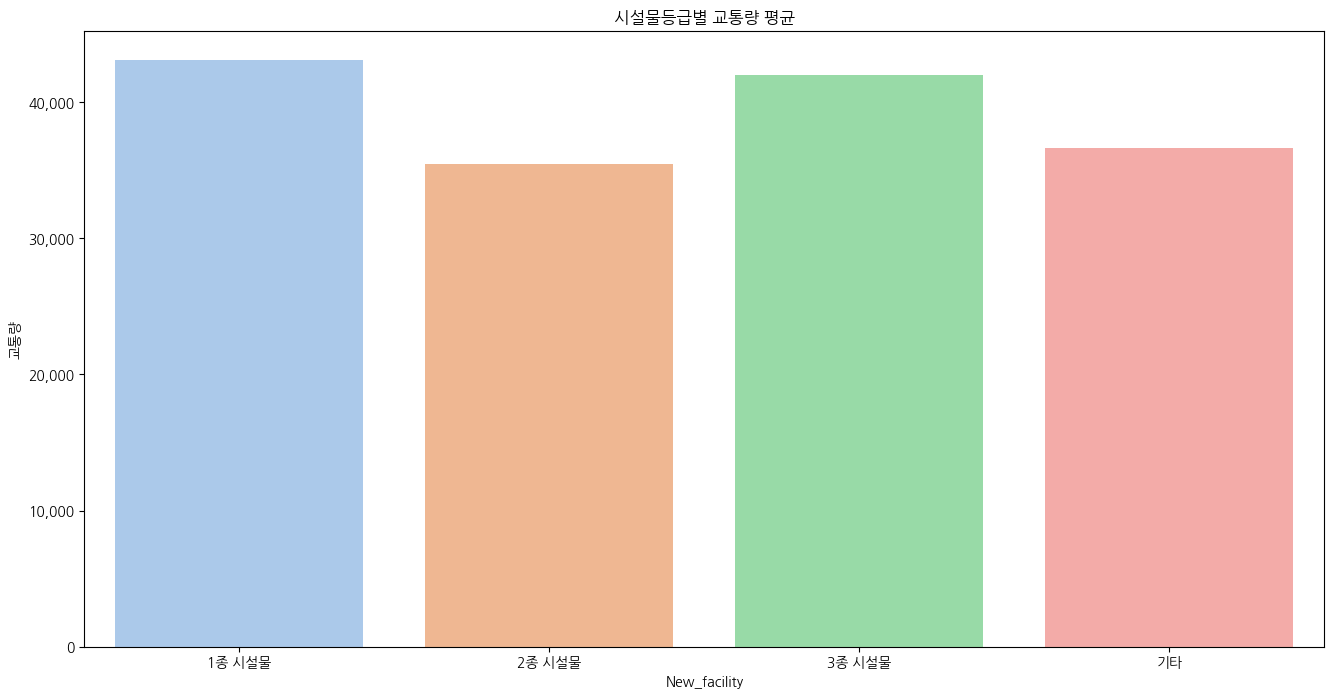

In [49]:
# 시설물등급에 따른 교통량평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_facility', y = '교통량', palette = 'pastel', data = mean_facility)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별 교통량 평균')
plt.show()

In [50]:
# 최종안전점검결과 등급 확인
new_df['최종안전점검결과'].unique()

array(['B', 'A', 'C', 'E', 'D'], dtype=object)

In [51]:
sum_Safegrade = new_df[['최종안전점검결과', '교통량']].groupby(['최종안전점검결과'], as_index = False).sum()
sum_Safegrade

,최종안전점검결과,교통량
0,A,20690613
1,B,164268295
2,C,10801592
3,D,195430
4,E,3109253


In [52]:
# 최종안전등급에 따른 교통량평균
mean_Safegrade = new_df[['최종안전점검결과', '교통량']].groupby(['최종안전점검결과'], as_index = False).mean()
mean_Safegrade

,최종안전점검결과,교통량
0,A,33158.033654
1,B,40600.171775
2,C,30512.971751
3,D,39086.000000
4,E,48582.078125


C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\1040091063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


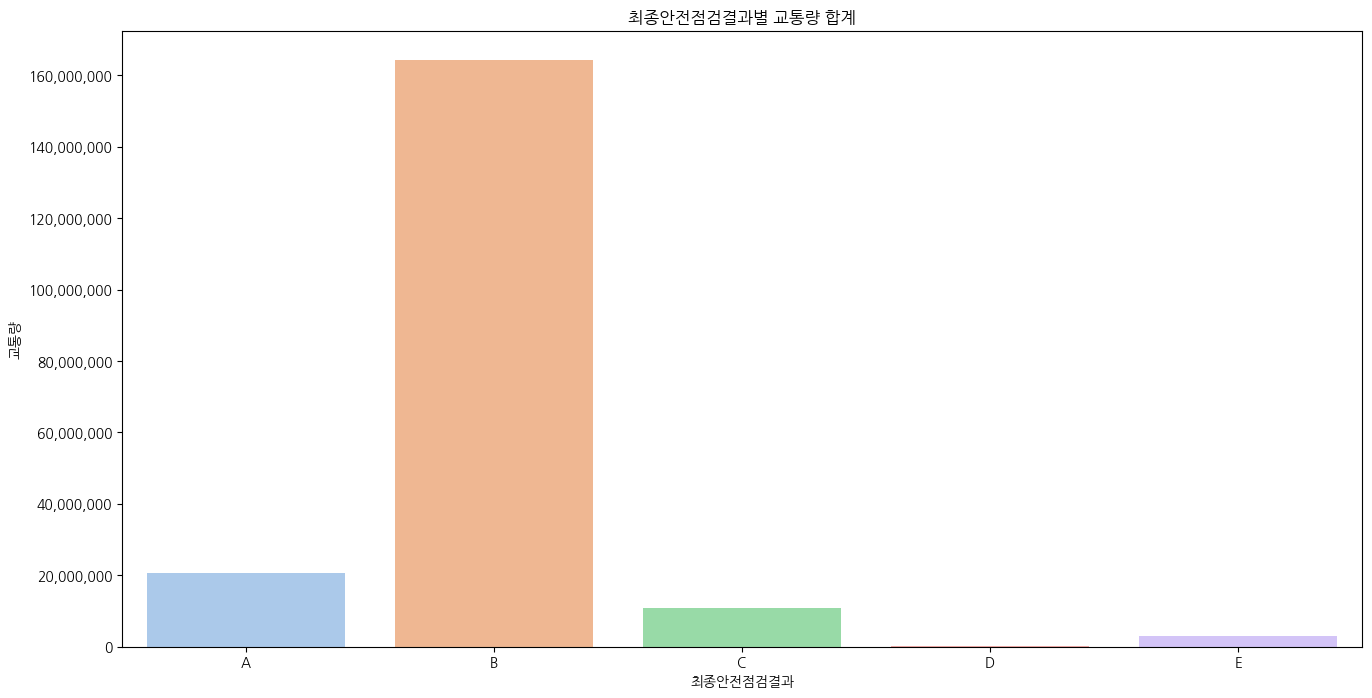

In [53]:
# 최종안전등급에 따른 교통량합계 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '최종안전점검결과', y = '교통량', palette = 'pastel', data = sum_Safegrade)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전점검결과별 교통량 합계')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\294963150.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


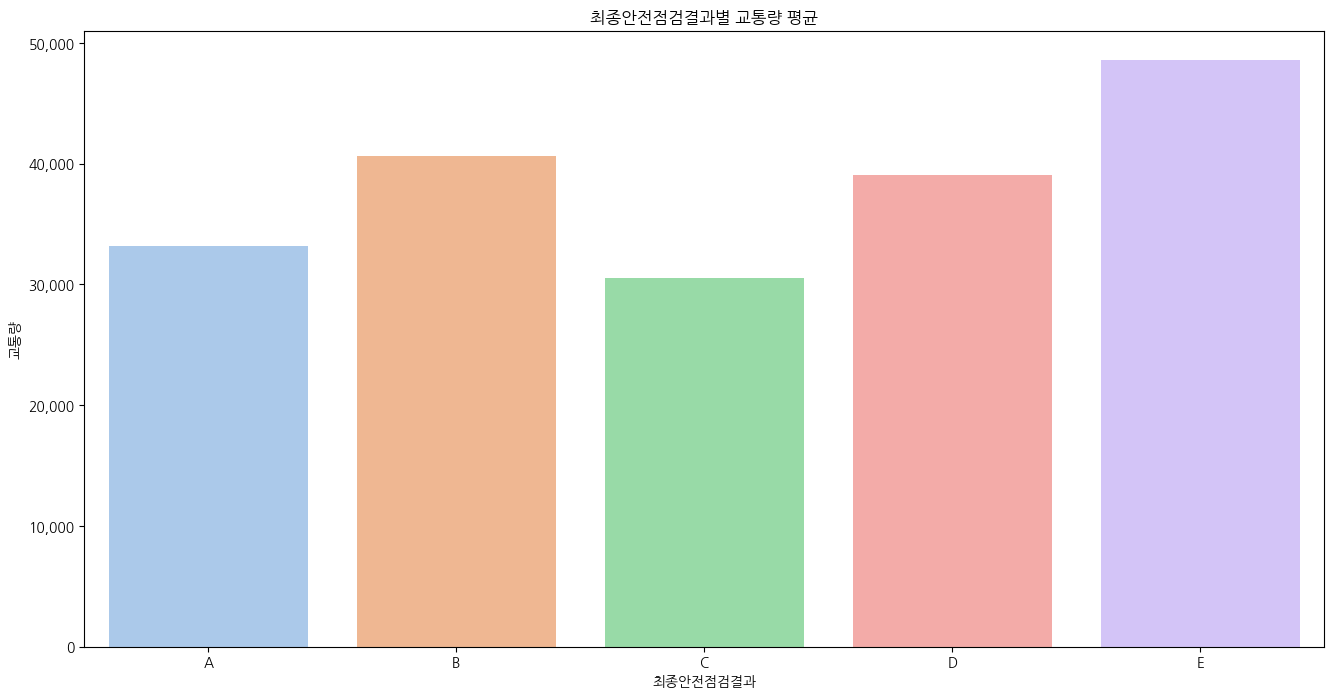

In [54]:
# 최종안전등급에 따른 교통량.평균 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = '최종안전점검결과', y = '교통량', palette = 'pastel', data = mean_Safegrade)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전점검결과별 교통량 평균')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\2841818139.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


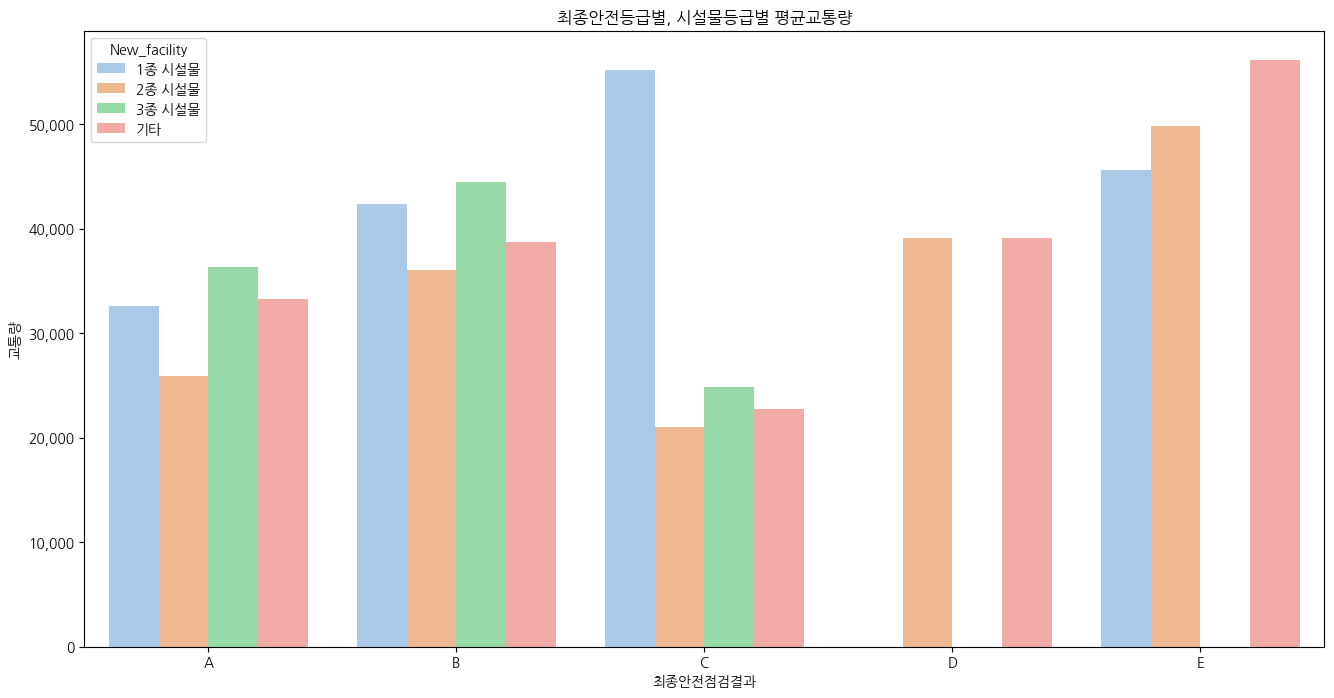

In [55]:
# 최종안전등급별, 시설물등급별 평균교통량 확인

plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'New_facility', palette = 'pastel', data = new_df, order = group_name,
            errorbar = None, hue_order = ['1종 시설물', '2종 시설물', '3종 시설물', '기타'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('최종안전등급별, 시설물등급별 평균교통량')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\940384305.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


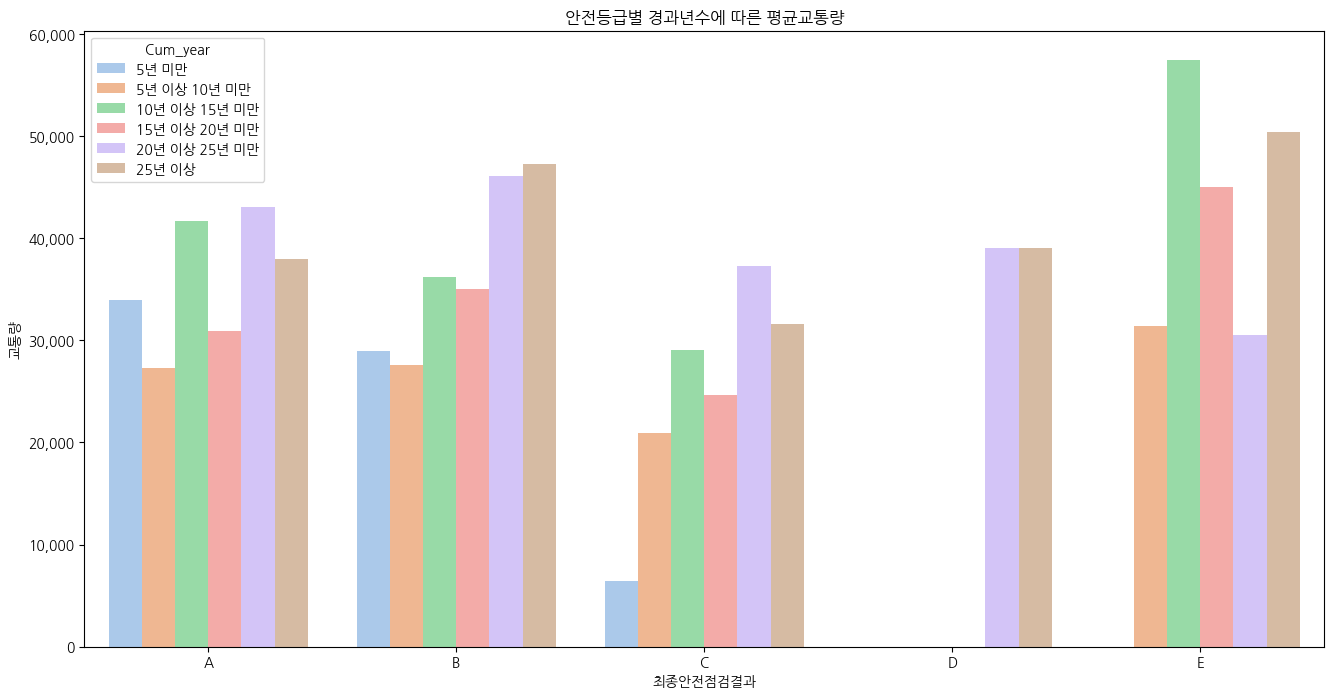

In [56]:
# 안전등급, 경과년수별에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['A', 'B', 'C', 'D', 'E']
sns.barplot(x = '최종안전점검결과', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = new_df, order = group_name, errorbar = None,
            hue_order = ['5년 미만', '5년 이상 10년 미만', '10년 이상 15년 미만', '15년 이상 20년 미만', '20년 이상 25년 미만', '25년 이상'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('안전등급별 경과년수에 따른 평균교통량')
plt.show()

C:\Users\chunc\AppData\Local\Temp\ipykernel_66696\589430743.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


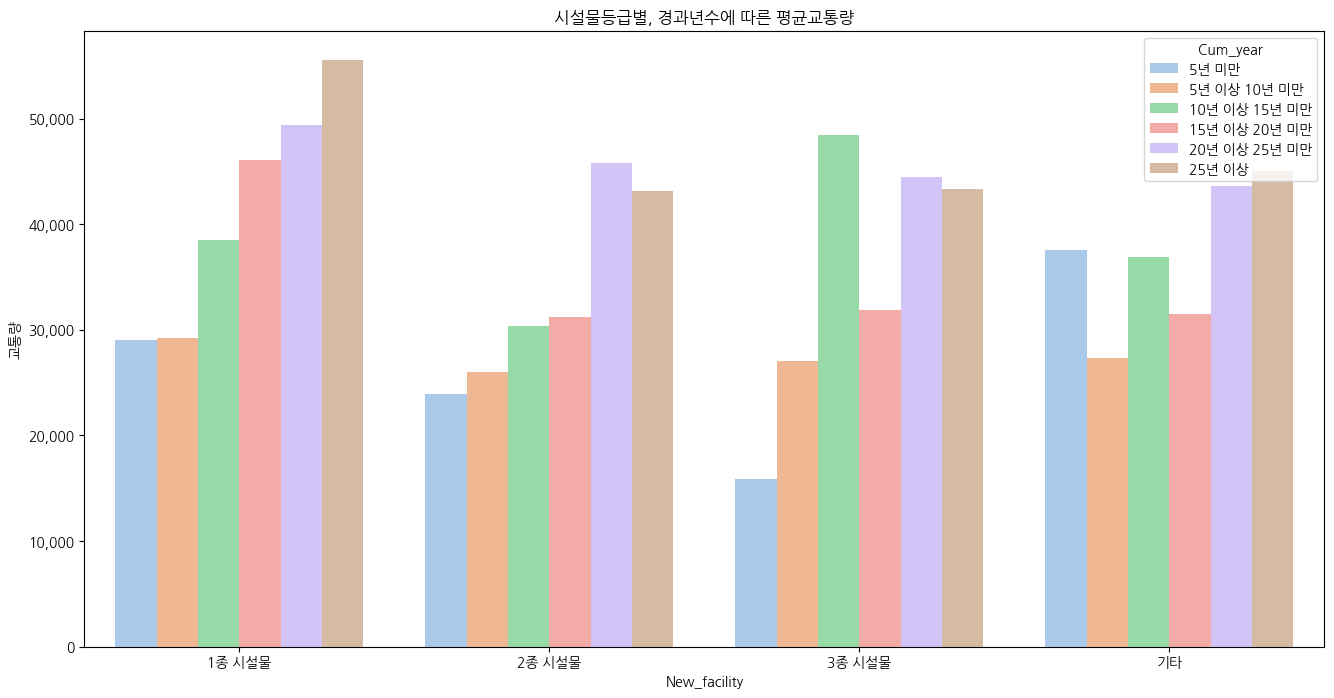

In [57]:
# 시설물등급, 경과년수에 따른 평균교통량 그래프 확인
plt.figure(figsize = (16, 8))
group_name = ['1종 시설물', '2종 시설물', '3종 시설물', '기타']
sns.barplot(x = 'New_facility', y = '교통량', hue = 'Cum_year', palette = 'pastel', data = new_df, order = group_name, errorbar = None,
            hue_order = ['5년 미만', '5년 이상 10년 미만', '10년 이상 15년 미만', '15년 이상 20년 미만', '20년 이상 25년 미만', '25년 이상'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('시설물등급별, 경과년수에 따른 평균교통량')
plt.show()